## Кластерізація

Детальніше можна почитати [тут](https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/) та 
[тут](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/).   Спочатку завантажимо необхідні бібліотеки. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist,cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Розглянемо Приклади 14.3.2(а,b) та 14.3.3  (див. Таблицю 14.1) з Rencher. В таблиці зображені дані по кримінальній ситуації в наступних місцях.  Для простоти ми просто пронумеруємо стовбчики. 

In [2]:
path = 'c:/Users/vica/Dropbox/KAU-Stat2/multivariate_analysis/T14_1_CITYCRIME.DAT'
#df = pd.DataFrame(path)
df = pd.read_table(path, header = None)
# data = pd.DataFrame(df1[:,1:], columns=['Y1','Y2','Y3','X1', 'X2', 'X3'])
print(df) 

             0     1     2      3    4     5     6     7      8
0      Atlanta   NaN  16.5   24.8  106   147  1112   905  494.0
1       Boston   NaN   4.2   13.3  122    90   982   669  954.0
2      Chicago   NaN  11.6   24.7  340   242   808   609  645.0
3       Dallas   NaN  18.1   34.2  184   293  1668   901  602.0
4       Denver   NaN   6.9   41.5  173   191  1534  1368  780.0
5      Detroit   NaN  13.0   35.7  477   220  1566  1183  788.0
6     Hartford   2.5   8.8   68.0  103  1017   724   468    NaN
7     Honolulu   3.6  12.7   42.0   28  1457  1102   637    NaN
8      Houston   NaN  16.8   26.6  289   186  1509   787  697.0
9           KC   NaN  10.8   43.2  255   226  1494   955  765.0
10          LA   NaN   9.7   51.8  286   355  1902  1386  862.0
11          NO   NaN  10.3   39.7  266   283  1056  1036  776.0
12          NY   NaN   9.4   19.4  522   267  1674  1392  848.0
13    Portland   5.0  23.0  157.0  144  1530  1281   488    NaN
14      Tucson   NaN   5.1   22.9   85  

Візьмемо перші 6 місць та виконаємо кластерізацію різними методами. 

In [3]:
df1 = pd.read_table(path, nrows = 6, usecols=[0, 2,3,4,5,6,7,8],  \
                    names=['city', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7'])
df1

,city,c1,c2,c3,c4,c5,c6,c7
0,Atlanta,16.5,24.8,106,147,1112,905,494
1,Boston,4.2,13.3,122,90,982,669,954
2,Chicago,11.6,24.7,340,242,808,609,645
3,Dallas,18.1,34.2,184,293,1668,901,602
4,Denver,6.9,41.5,173,191,1534,1368,780
5,Detroit,13.0,35.7,477,220,1566,1183,788


Спочатку проіндексуємо множину за містами. 

In [4]:
df1 = df1.set_index('city') 
df1

,c1,c2,c3,c4,c5,c6,c7
city,,,,,,,
Atlanta,16.5,24.8,106,147,1112,905,494
Boston,4.2,13.3,122,90,982,669,954
Chicago,11.6,24.7,340,242,808,609,645
Dallas,18.1,34.2,184,293,1668,901,602
Denver,6.9,41.5,173,191,1534,1368,780
Detroit,13.0,35.7,477,220,1566,1183,788


Тепер обчислими відстань між містами, використовуючи евклідову метрику в просторі розмірності 7. 

In [5]:
pdist(df1, 'euclidean')

array([ 536.6419104 ,  516.37004173,  590.17532988,  693.57411284,
        716.19624406,  447.40330799,  833.07083732,  914.97843144,
        881.0858074 ,  924.00351731, 1073.39476895,  971.52712777,
        527.66725311,  464.46771685,  358.66537329])

Перетворимо ці дані в квадратну матрицю. 

In [6]:
dist1 = pd.DataFrame(squareform(pdist(df1, 'euclidean')), columns=df1.index.values,index=df1.index.values).round(decimals = 1)
dist1

,Atlanta,Boston,Chicago,Dallas,Denver,Detroit
Atlanta,0.0,536.6,516.4,590.2,693.6,716.2
Boston,536.6,0.0,447.4,833.1,915.0,881.1
Chicago,516.4,447.4,0.0,924.0,1073.4,971.5
Dallas,590.2,833.1,924.0,0.0,527.7,464.5
Denver,693.6,915.0,1073.4,527.7,0.0,358.7
Detroit,716.2,881.1,971.5,464.5,358.7,0.0


Зробимо тепер кластеразацію **методом найближчого сусіда**. При цьому ми обчислюємо відстань між кластерами наступним чином: 
$$ 
	D(A,B)= \max\{ d(y_i,y_j): \quad y_i\in A, \quad y_j\in B\}, 
$$
Два кластери, у яких $D(A,B)$  мінімальне, об'єднуют в один. 
    
Побудуємо дендрограму методом найближчого сусіда.

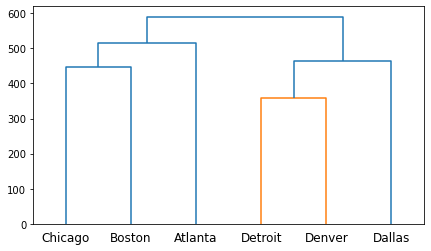

In [7]:
linked = linkage(df1, 'single')
plt.figure(figsize=(7, 4))
dendrogram(linked,
            orientation='top',
            labels=df1.index.values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Перерахуємо кластери в порядку групування: 
    
1. $C_1 = \{$ Detroit, Denver$\}$,

2. $C_2 = \{$ Chicago, Boston$\}$,

3. $C_3 = \{$ $C_1$, Dallas$\}$,

4. $C_4 = \{$ $C_2$, Athlanta$\}$, 

5. $C_3 = \{$ $C_3$, $C_3 \}$. 

Порівняємо результати з кластерізацієй методами найшвидшого сусіда, усереднення,   ['complete', 'average', 'centroid', 'ward'] Див. [тут](https://github.com/scipy/scipy/blob/v1.8.0/scipy/cluster/hierarchy.py#L837-L1081)


	
**Метод найшвидшого сусіда (fastest neighbour method).** 
	
$$ 
D(A,B)= \max\{ d(y_i,y_j): \quad y_i\in A, \quad y_j\in B\}, 
$$
Два кластери, у яких $D(A,B)$  мінімальне, об'єднуют в один. 
	
**Метод середньої відстані (average linkage  method).**  
	
$$ 
D(A,B)= \frac{1}{n_A n_B} \sum_{i=1}^{n_A} \sum_{j=1}^{n_B}  d(y_i,y_j). 
$$
Так само: два кластери, у яких  відстань  $D(A,B)$  мінімальна, об'єднуют в один. 
	
	
**Метод центроїда (centroid   method).**  
	
$$ 
D(A,B)= d(\bar{y}_A, \bar{y}_B), \quad \bar{y}_A :=
	\frac{1}{n_A} \sum_{i=1}^{n_A} y_{i}.
$$
Об'єднуємо в один  два кластери, у яких  відстань  $D(A,B)$  мінімальна, та обираємо новий центр за формулою 
$$
\bar{y}_{AB} =\frac{n_A \bar{y}_A + n_B \bar{y}_B}{n_A+n_B}. 
$$

**Метод Варда. **

Метод Варда полягає в тому, щоб з'єднувати два кластери, у яких відстань 
$$
	I_{AB}= SSE_{AB}- (SSE_A + SSE_B)= \frac{n_A n_B}{n_A + n_B} (\bar{y}_A- \bar{y}_B)' (\bar{y}_A- \bar{y}_B). 
$$
є мінімальною. 
Тут
$$
SSE_A := \sum_{i=1}^{n_A} (y_i - \bar{y}_A)'(y_i - \bar{y}_A), 
$$
$$
SSE_B := \sum_{i=1}^{n_B} (y_i - \bar{y}_B)'(y_i - \bar{y}_B), 
$$
$$
SSE_{AB} := \sum_{i=1}^{n_{AB}} (y_i - \bar{y}_{AB})'(y_i - \bar{y}_{AB}). 
$$

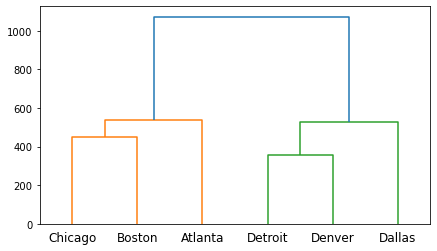

In [8]:
linked = linkage(df1, 'complete')
plt.figure(figsize=(7, 4))
dendrogram(linked,
            orientation='top',
            labels=df1.index.values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

При цьому  розбиття на кластери таке саме, як і при кластерізації методом найближчого сусіда. 

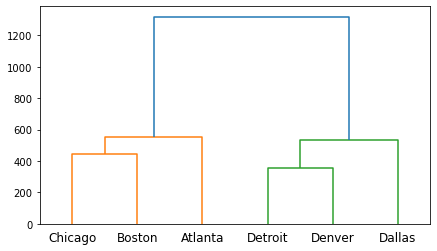

In [9]:
linked = linkage(df1, 'ward')
plt.figure(figsize=(7, 4))
dendrogram(linked,
            orientation='top',
            labels=df1.index.values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Зобразимо на одній картинці дендрограми, побудовані різними способами. 

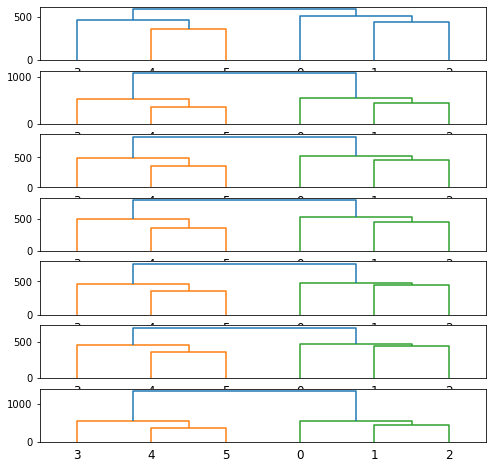

In [10]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

fig, axs = plt.subplots(len(methods),figsize=(8,8))

for i in range(len(methods)):
    dendrogram(linkage(df1, method=methods[i]), ax = axs[i])

Перейдемо тепер до методу середніх.  Завантажимо KMeans, і застосуємо цей метод на df1. При цьому ми оберемо 3 кластери. 

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=10, random_state=2)
kmeans.fit(df1)

KMeans(max_iter=10, n_clusters=3, random_state=2)

Отже, ми віднесли Даллас, Денвер і Детройт до першого кластеру, Бостон і Чікаго до другого, і Атланту до третього. 

In [13]:
y_kmeans = kmeans.predict(df1)
y_kmeans

array([0, 2, 2, 1, 1, 1])

In [14]:
print(kmeans.labels_)

[0 2 2 1 1 1]


Класифікуємо тепер Хьюстон і КС (Канзас сіти):

In [15]:
df4 = pd.read_table(path, nrows =10, usecols=[0, 2,3,4,5,6,7,8],  \
                    names=['city', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7'])
df4 = df4.set_index('city') 
df5= df4.loc['Houston':'KC',:]
df5

,c1,c2,c3,c4,c5,c6,c7
city,,,,,,,
Houston,16.8,26.6,289,186,1509,787,697.0
KC,10.8,43.2,255,226,1494,955,765.0


In [16]:
predicted_class = kmeans.predict(df5)
print(predicted_class)

[1 1]


Отже, ми класифікували ці міста в першу групу. 

Застосування методу $k$  середніх для стискання зображень (див.  [тут](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html))

З'ясуємо, як обрати оптимальну кількість кластерів в методі $k$ середніх. Розглянемо ''метод локтя'' (elbow method). Див., наприклад, 
[тут](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/). 

In [17]:
from sklearn import metrics

Розглянемо тепер повну таблицю. Ми відкидаємо останню колонку, оскільки деякі дані там не визначені. 

In [18]:
df6 = pd.read_table(path,  usecols=[0,2,3,4,5,6,7],  \
                    names=['city','c1', 'c2', 'c3', 'c4', 'c5', 'c6'])
df6 = df6.set_index('city') 
df6

,c1,c2,c3,c4,c5,c6
city,,,,,,
Atlanta,16.5,24.8,106,147,1112,905
Boston,4.2,13.3,122,90,982,669
Chicago,11.6,24.7,340,242,808,609
Dallas,18.1,34.2,184,293,1668,901
Denver,6.9,41.5,173,191,1534,1368
Detroit,13.0,35.7,477,220,1566,1183
Hartford,8.8,68.0,103,1017,724,468
Honolulu,12.7,42.0,28,1457,1102,637
Houston,16.8,26.6,289,186,1509,787


Обчислимо при кожному $k$

1. Середній квадрат відстані елементів від центрів кластерів. Для цього оберемо евклідову метрику. Цей параметр називається Distortion;
2. Суми квадратів відстаней від елементів до найближчого кластеру. Цей параметр називається Inertias. 

In [19]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df6)
    kmeanModel.fit(df6)

    distortions.append(sum(np.min(cdist(df6, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df6.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df6, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df6.shape[0]
    mapping2[k] = kmeanModel.inertia_


C:\Users\vica\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vica\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Наведемо ці значення та побудуємо відповідні графіки. 

In [20]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 655.3429259128797
2 : 397.9223475693735
3 : 291.40641554404067
4 : 240.68464688688738
5 : 200.93250091850197
6 : 169.67512954683698
7 : 146.64469461448178
8 : 125.98331948016117
9 : 105.50026029342224


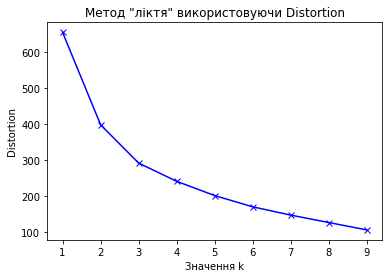

In [21]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Значення k')
plt.ylabel('Distortion')
plt.title('Метод "ліктя" використовуючи Distortion')
plt.show()


In [22]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 7919202.096875001
2 : 2908523.5708333333
3 : 1493221.5689285714
4 : 1096209.3275
5 : 761780.7766666666
6 : 585682.7349999999
7 : 432854.94833333336
8 : 335632.32500000007
9 : 253333.76333333334


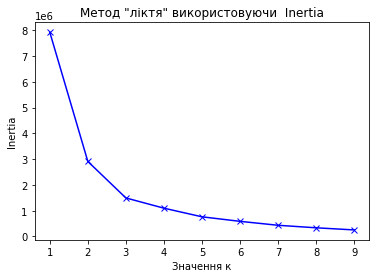

In [23]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Значення к')
plt.ylabel('Inertia')
plt.title('Метод "ліктя" використовуючи  Inertia')
plt.show()

Як ми бачимо, при $k=3$ відбувається злам кривої. Тому оберемо 3 кластери. Наведемо ті міста, які входять к кластери на $k$-му кроці. 

In [24]:
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df6)
    print(kmeanModel.fit(df6).labels_)

C:\Users\vica\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vica\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1]
[2 2 2 0 0 0 1 1 0 0 0 2 0 1 2 1]
[3 3 3 0 2 2 1 1 0 0 2 3 2 1 3 1]
[2 2 2 3 1 1 0 4 3 3 1 2 1 4 2 4]
[2 2 2 1 3 3 5 4 1 1 3 2 3 4 2 0]
[3 0 0 4 2 2 5 1 4 4 2 3 2 1 3 6]
[7 2 2 3 0 0 4 1 3 3 6 7 0 1 7 5]
[1 6 6 3 8 4 2 0 3 3 7 1 4 0 1 5]


In [25]:
cluster = np.array([[0]*16 for k in range(10)])
cluster.shape
cluster[9,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
for k in K:
    cluster[k,:] = KMeans(n_clusters=k).fit(df6).labels_ 
print(cluster)

C:\Users\vica\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1]
 [2 2 2 0 0 0 1 1 0 0 0 2 0 1 2 1]
 [0 0 0 3 2 2 1 1 3 3 2 0 2 1 0 1]
 [2 2 2 3 0 0 4 1 3 3 0 2 0 1 2 1]
 [0 0 5 2 4 4 3 1 2 2 4 0 4 1 0 1]
 [3 6 6 0 2 2 4 5 0 0 2 3 2 5 3 1]
 [2 2 6 3 0 0 4 1 3 3 7 2 0 1 2 5]
 [5 0 0 3 8 1 6 2 3 3 7 5 1 2 5 4]]


In [27]:
df_new = pd.concat([pd.DataFrame(df6.index), pd.DataFrame(cluster.T, dtype = int)], axis=1)
df_new

,city,0,1,2,3,4,5,6,7,8,9
0,Atlanta,0,0,0,2,0,2,0,3,2,5
1,Boston,0,0,0,2,0,2,0,6,2,0
2,Chicago,0,0,0,2,0,2,5,6,6,0
3,Dallas,0,0,0,0,3,3,2,0,3,3
4,Denver,0,0,0,0,2,0,4,2,0,8
5,Detroit,0,0,0,0,2,0,4,2,0,1
6,Hartford,0,0,1,1,1,4,3,4,4,6
7,Honolulu,0,0,1,1,1,1,1,5,1,2
8,Houston,0,0,0,0,3,3,2,0,3,3
9,KC,0,0,0,0,3,3,2,0,3,3
